In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import pandas as pd
import re
%matplotlib inline

In [2]:
pdfbox_system = pd.read_csv("../execution/system-test-report.csv")
pdfbox_production = pd.read_csv("../execution/report.csv")

In [3]:
pdfbox_set1 = set(pdfbox_system['CLASS_METHOD'])
pdfbox_set1.remove('TOTAL')
pdfbox_set2 = set(pdfbox_production['method'])
pdfbox_set2.remove('TOTAL')

In [4]:
sanitized_pdfbox_set2 = set()
for i in pdfbox_set2:
    i = re.sub(r'.+?\.(?=[A-Z])', "", i)
    i = re.sub(r'\.', "_", i)
    sanitized_pdfbox_set2.add(i)

In [5]:
print(len(pdfbox_set1))
print(len(sanitized_pdfbox_set2))

111
46


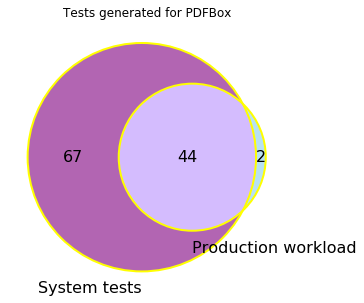

In [6]:
plt.figure(figsize=(5,5))
vd1 = venn2(subsets = (pdfbox_set1, sanitized_pdfbox_set2), 
      set_labels = ('System tests', 'Production workload'), 
      set_colors=('purple', 'skyblue'),
      alpha = 0.6)

venn2_circles([pdfbox_set1, sanitized_pdfbox_set2], linestyle='-', linewidth=2, color='yellow')
for text in vd1.set_labels:
    text.set_fontsize(16);
for text in vd1.subset_labels:
    text.set_fontsize(16)
    
plt.title("Tests generated for PDFBox");

In [7]:
broadleaf_system = pd.read_csv("../../broadleaf-framework/exp-on-system-tests/pankti-object-data/invoked-methods.csv")
broadleaf_production = pd.read_csv("../../broadleaf-framework/report.csv")

In [8]:
broadleaf_system["CLASS.METHOD"] = broadleaf_system["parent-FQN"] + "." + broadleaf_system["method-name"]
broadleaf_set1 = set(broadleaf_system['CLASS.METHOD'])
broadleaf_set2 = set(broadleaf_production['method'])
print(len(broadleaf_set1))
broadleaf_set2.remove('TOTAL')
print(len(broadleaf_set2))

26
11


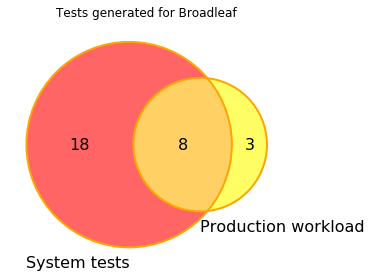

In [9]:
plt.figure(figsize=(5,5))
vd2 = venn2(subsets = (broadleaf_set1, broadleaf_set2), 
      set_labels = ('System tests', 'Production workload'), 
      set_colors=('red', 'yellow'),
      alpha = 0.6)

venn2_circles([broadleaf_set1, broadleaf_set2], linestyle='-', linewidth=2, color='orange')
for text in vd2.set_labels:
    text.set_fontsize(16);
for text in vd2.subset_labels:
    text.set_fontsize(16)

plt.title("Tests generated for Broadleaf");

In [10]:
jicofo_system = pd.read_csv("../../jitsi-jicofo/exp-on-system-tests/pankti-object-data/invoked-methods.csv")
jicofo_production = pd.read_csv("../../jitsi-jicofo/report.csv")

In [11]:
jicofo_system["CLASS.METHOD"] = jicofo_system["parent-FQN"] + "." + jicofo_system["method-name"]
jicofo_set1 = set(jicofo_system['CLASS.METHOD'])
jicofo_set2 = set(jicofo_production['method'])
print(len(jicofo_set1))
jicofo_set2.remove('TOTAL')
print(len(jicofo_set2))

29
29


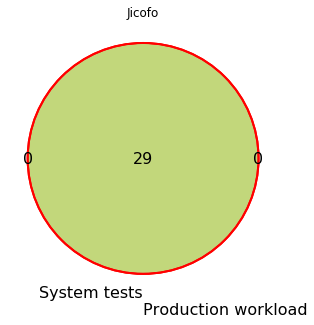

In [12]:
plt.figure(figsize=(5,5))
vd3 = venn2(subsets = (jicofo_set1, jicofo_set2), 
      set_labels = ('System tests', '\nProduction workload'), 
      set_colors=('teal', 'orange'),
      alpha = 0.8)

venn2_circles([jicofo_set1, jicofo_set2], linestyle='-', linewidth=2, color='red')
for text in vd3.set_labels:
    text.set_fontsize(16);
for text in vd3.subset_labels:
    text.set_fontsize(16)

plt.title("Jicofo");